In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

DATA CLEANING PROCESS

In [114]:
data = pd.read_csv('Zomato-data-.csv')

In [115]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [116]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [117]:
data.dtypes

name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
approx_cost(for two people)     int64
listed_in(type)                object
dtype: object

In [118]:
data.duplicated().sum()

np.int64(0)

In [119]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [120]:
data.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [121]:
data.to_csv('data1.csv', index=False)

EXPLORATORY DATA ANALYSIS(EDA)

In [122]:
df = pd.read_csv('data1.csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [123]:
df.shape

(148, 7)

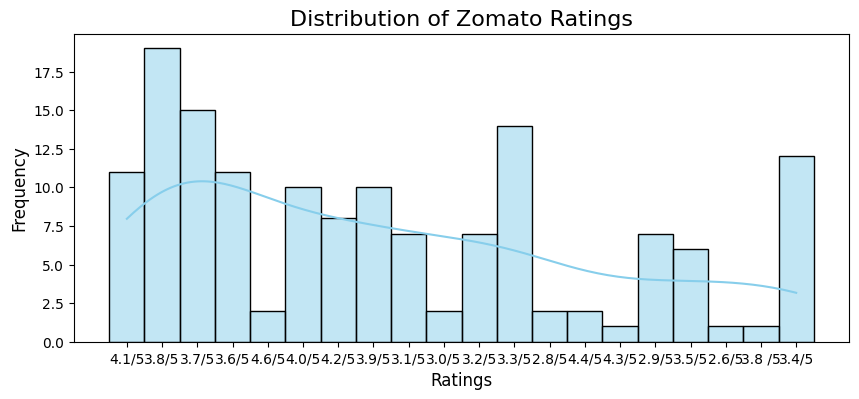

In [125]:
plt.figure(figsize=(10, 4)) 
sns.histplot(df['rate'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Zomato Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

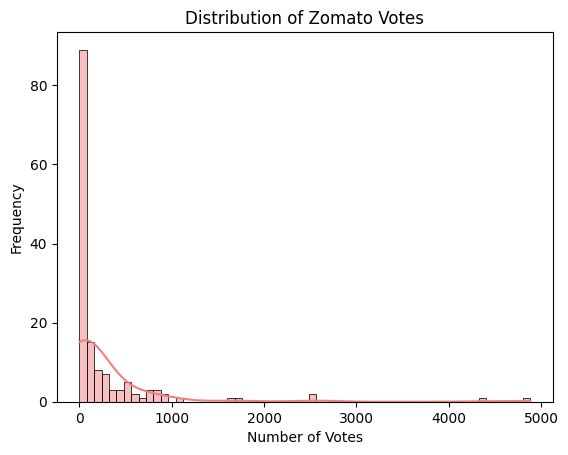

In [126]:
sns.histplot(df['votes'], kde=True, color='lightcoral')
plt.title('Distribution of Zomato Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

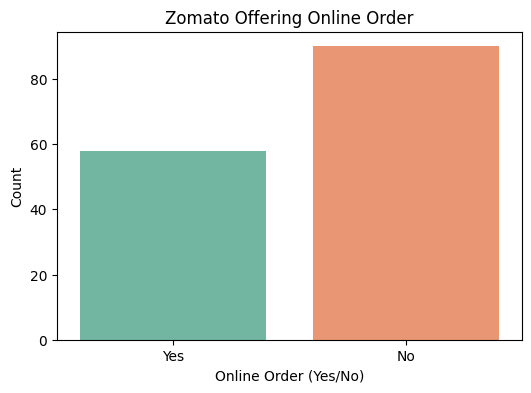

In [127]:
plt.figure(figsize=(6, 4))
sns.countplot(x='online_order', data=df, palette='Set2')
plt.title('Zomato Offering Online Order')
plt.xlabel('Online Order (Yes/No)')
plt.ylabel('Count')
plt.show()

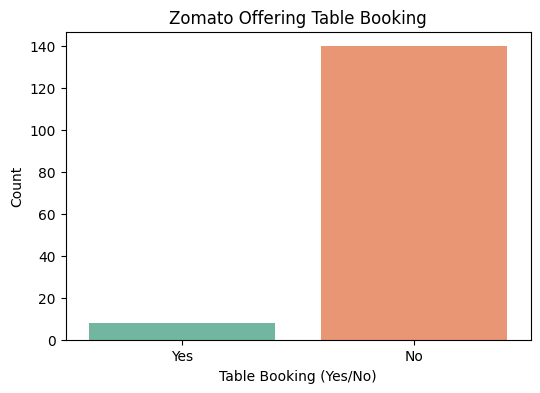

In [128]:
plt.figure(figsize=(6, 4))
sns.countplot(x='book_table', data=df, palette='Set2')
plt.title('Zomato Offering Table Booking')
plt.xlabel('Table Booking (Yes/No)')
plt.ylabel('Count')
plt.show()

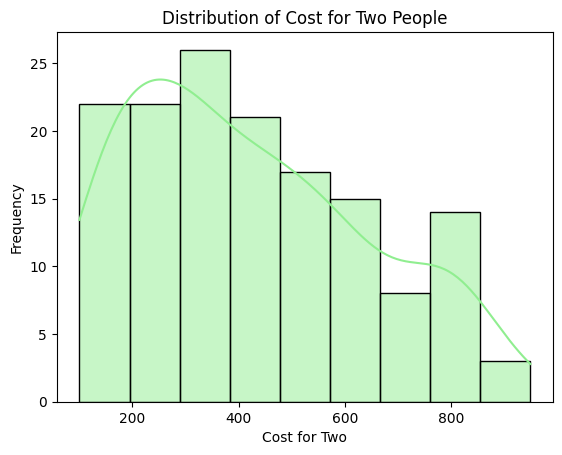

In [129]:
sns.histplot(df['approx_cost(for two people)'], kde=True, color='lightgreen')
plt.title('Distribution of Cost for Two People')
plt.xlabel('Cost for Two')
plt.ylabel('Frequency')
plt.show()

In [130]:
top_types = df['listed_in(type)'].value_counts().head(10)
top_types

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

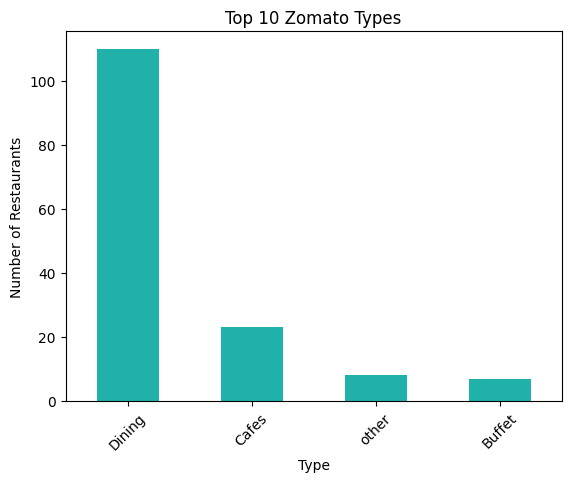

In [131]:
top_types.plot(kind='bar', color='lightseagreen')
plt.title('Top 10 Zomato Types')
plt.ylabel('Number of Restaurants')
plt.xlabel('Type')
plt.xticks(rotation=45)
plt.show()

In [133]:
df['rate'] = df['rate'].str.extract('(\d+\.\d+)').astype(float)

In [134]:
corr = df[['rate', 'votes', 'approx_cost(for two people)']].corr()

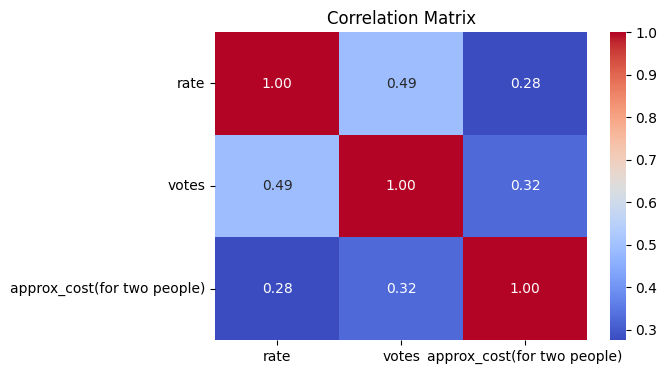

In [135]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

INSIGHTS FOR ZOMATO

1.Ratings Distribution: Most restaurants have high ratings. If ratings are concentrated in a narrow range, it may indicate that most restaurants perform at a similar level.

2.Votes Distribution: A large number of votes for certain restaurants could indicate popularity. Outliers with many votes but low ratings can signal controversial restaurants.

3.Online Orders and Table Booking: If most restaurants offer online ordering and table booking, it suggests that these features are highly valued in the industry.
Cost for Two: The typical cost for two might vary by restaurant type and location. You may find that fine dining restaurants have significantly higher costs than casual dining spots.

4.Restaurant Types: By examining the most common restaurant types, you can infer the most prevalent dining categories. If "Casual Dining" dominates, it suggests this is the most widespread format.

5.Correlation Between Ratings and Votes: There could be a strong correlation, meaning more popular (higher vote) restaurants tend to get higher ratings. This is useful for building a recommendation system.